# Fitting

In this course we have often encountered situations where we we want to fit a model to data.  In many such situations the model is defined parametricly by a fuciton $f(x|p)$ defined by one or more parmaters p.  Here x is the indepednant variable(s) which paramterizes the samplng of the experiment.  The fitting procedure requires finding p which best apporximate the data $d_i(x_i)$.  Here best is defined by some reasonable metric which could be the liklihood (or other probability distribtion), $\chi^2$, or other resonable choice. 

Since this problem is such a common concern there are vast libraries we can draw from. [Optomize](https://docs.scipy.org/doc/scipy/reference/optimize.html) is a convenient library is included in scipy.   Take a moment to read through the many functions included in it.  

In what follows we will first play with the minimiation codes on a toy example with two local and one global maxima.  After playing with a few example fitting routines we will shift to a paramter estimiation (fiting) problem. 


## Minimization Codes

Minimizaiton codes find extremum of funcitons.  If the funciton is a probability or chi-squared they can be used to find a best fit solution.  We start with minimzing a generic fuction before movig on to doing curve fits.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

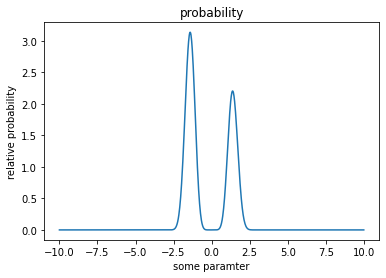

In [43]:
def f(x):
    """ This is the function we want to minimize.
        we will consider this to be the negative of the probability
    """
    return (np.sin(x)**8 )*np.exp(-0.5*x**2) * (8.-x) * -1
    #return np.exp(-0.5*((x-2.)/.5)**2)*np.exp(-0.5*((x+2.)/.5)**2)

    
x = np.linspace(-10,10,1000)
plt.plot(x,f(x)*-1)
plt.title("probability")
plt.ylabel("relative probability")
plt.xlabel("some paramter")
plt.show()

we want to find the maximum of this probabbility.  We have written our fucniton to return the neagative of the probability so that we can use the canned minimizaiton routines to find the maximum probability.

We will use opt.minimize to do this.  This funciton allows the use of many different otomization methods which are documented [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize).  A few of fhe simplests methods include
1. [Nelder-Mead](https://en.wikipedia.org/wiki/Nelder–Mead_method) also known as the Amoeaba method
1. [Powell](https://en.wikipedia.org/wiki/Powell%27s_method)
1. [Conjugate Gradient (CG)](https://en.wikipedia.org/wiki/Conjugate_gradient_method)
1. there are many others not listed here.

beset fit x:  [0.]


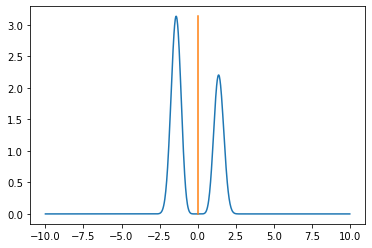

In [85]:
x0 = [0]  ## starting point
res = opt.minimize(f, x0, method='CG', tol=1e-6)
print("beset fit x: ", res.x)


x = np.linspace(-10,10,1000)
plt.plot(x,f(x)*-1)
plt.plot(np.array([1,1])*res.x,np.array([1,0])*np.min(f(x))*-1)
plt.show()


The vertical orange line shows the position of the "best fit."   Clearly this answere is incorret.   This pathology arises from a combination of the methodology and the startig poing we gave to the minimizaiton routine.

## excercises
Try the follwoing and get a feel for what happens
1. change to the Powell method
1. change the starting point to -10
1. change the starting point to +10
1. change the starting point to 5
1. change the starting point to -.1
1. change the starting point to -.5
1. explore on your own.


## some notes on minimizaiton

What you should gather is that minimization routines can give you extremely wrong answeres if you aren't extremely careful about staring points and the choice of technique.   

In this example we know and can fully compute the shape of the probability funciton we are minimizing.   In many realworld examples this is not possible.  In these cases you have to be exceedingly careful.  I recomend some combination of the following apporaches:

1. run the minimization with multiple initial guesses and compare the outputs
1. study the minimization results you get by plotting the fuciton in that region
1. if the minimization is a fit to data, plot the data, the model, and the residuals.  This is one of the best things you can do. If it doesn't pass the fit by eye tests, you know you have work to do.

## basinhopping

a useful minimization technqique is called [basinhopping](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.basinhopping.html#scipy.optimize.basinhopping).  It runs the above minimizaiton routines multiple times with randomly chosen intitial guess.  If you choose the stepsize (search volume, roughly) carefully it can make the above methods more robust.

best fit x:  [-1.40933241]


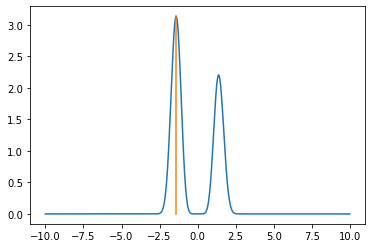

In [137]:
minimizer_kwargs = {"method": "CG"}
res = opt.basinhopping(f, 10,
                       stepsize = 10,
                       niter=100,
                       minimizer_kwargs=minimizer_kwargs, 
                       callback="print_fun")
                       
print("best fit x: ", res.x)


x = np.linspace(-10,10,1000)
plt.plot(x,f(x)*-1)
plt.plot(np.array([1,1])*res.x,np.array([1,0])*np.min(f(x))*-1)
plt.show()

## excercises
1. play with the intial guesses and convince yourself that this is more robust
1. comment out the "stepsize" keyword and use a starting point at +10.  Note this failure.

The reason I always stress using fit by eye whne possible is that these minimizaiton routines really benefit from good guesses, and your brain is actually very good at getting close to the true answere in a statistical sense.

## curve fitting

In this example lets fit a straight line to a data set.  I have purposuly added a small qubic term to the data so we can see what happens when we add more paramters and evaluate if there is gain from adding these.

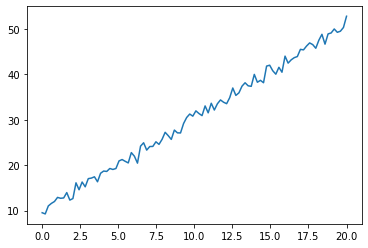

In [185]:
Npts = 100
x = np.linspace(0,20,Npts)

def gen_data(x,params):
    return(params[0]+params[1]*x + (x/20)**3)

params= np.array([10,2])

y =  gen_data(x,params) +np.random.randn(Npts) 

plt.plot(x,y)
plt.show()

We could write a funciton that returns the probability of the data given the model, or chi-squared, and then pass this to one of the minimizaiton codes we used above.  I often do this.   Here we do a related alternative, whcih is to use an existing [least-squares](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares) code to fit the model.

We first writ a function which returns the residuals given model parmaters P, .


In [163]:
def fun(params, x, data):
    return params[0] + params[1] * x - data

params = np.array([0,-1])

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.4744e+01                                    6.30e+02    
       1              2         3.9826e+01      1.49e+01       1.13e-01       2.74e-06    
       2              3         3.9826e+01      0.00e+00       0.00e+00       2.74e-06    
`xtol` termination condition is satisfied.
Function evaluations 3, initial cost 5.4744e+01, final cost 3.9826e+01, first-order optimality 2.74e-06.
[9.90069547 2.05439841]


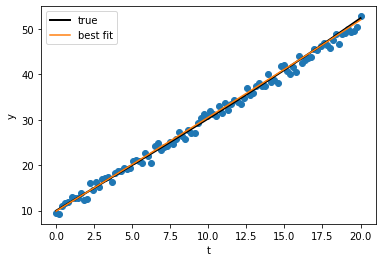

In [186]:
res_lsq = opt.least_squares(fun, params, args=(x, y),
                            verbose =2,
                           ftol = 1e-12)

print(res_lsq.x)
y_lsq = gen_data(x, res_lsq.x)

plt.plot(x, y, 'o')
plt.plot(x, 10+ 2*x +(x/15)**3, 'k', linewidth=2, label='true')
plt.plot(x, y_lsq, label='best fit')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

this exmaple works pretty well and gives a reasonabel answere.   

## discussion quesitons
1. how do the fit paramters compare with the input paramters?
1. what are some methods that could be used to estimate the uncertainties on the fit paramteters.  I can imagine simulating the data set and fitting proceudre as one, varyng the paramters and using the delta chi-squared test as a second.  The minimization code may also supply estimates for these.  If the canned routine is used these other two methods are important as checks.
1. we know the data has a quadratic term.  How could you determine if the fit benefits from an additional paramter.  Discuss using the chi-squared goodness of fit and what constitutes enough of an improvemnet to warent inlusion of this new paramater.
1. assuming you don't know the noise on the data points, how could you estimate this durng the fit process?
1. if the noise varried with sampling time (e.g., non-uniform noise) how would you include that in this fit?